### Basic [Gym](https://www.gymlibrary.dev/) usage

In [1]:
import gym
from gym import envs
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mediapy as media
from moviepy.video.io.bindings import mplfig_to_npimage
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
np.set_printoptions(precision=2)
print ("gym:[%s]"%(gym.__version__))
print ("numpy:[%s]"%(np.__version__))
print ("matplotlib:[%s]"%(matplotlib.__version__))

gym:[0.26.2]
numpy:[1.22.4]
matplotlib:[3.7.1]


### FrozenLake8x8 environment

In [2]:
env = gym.make('FrozenLake8x8-v1',render_mode='rgb_array')
print ("[%s] initialized."%(env.unwrapped.spec.id))

[FrozenLake8x8-v1] initialized.


In [3]:
def plot_env(env,figsize=(4,4),title_str=None,title_fs=10,
             PLOT_IMG=True,RETURN_IMG=False):
    img = env.render()
    fig = plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.axis('off')
    if title_str is not None:
        plt.title(title_str,fontsize=title_fs)
    if PLOT_IMG:
        plt.show()
    # (Optional) Get image
    if RETURN_IMG:
        img = mplfig_to_npimage(fig)
        plt.close()
        return img
    
print ("Ready.")

Ready.


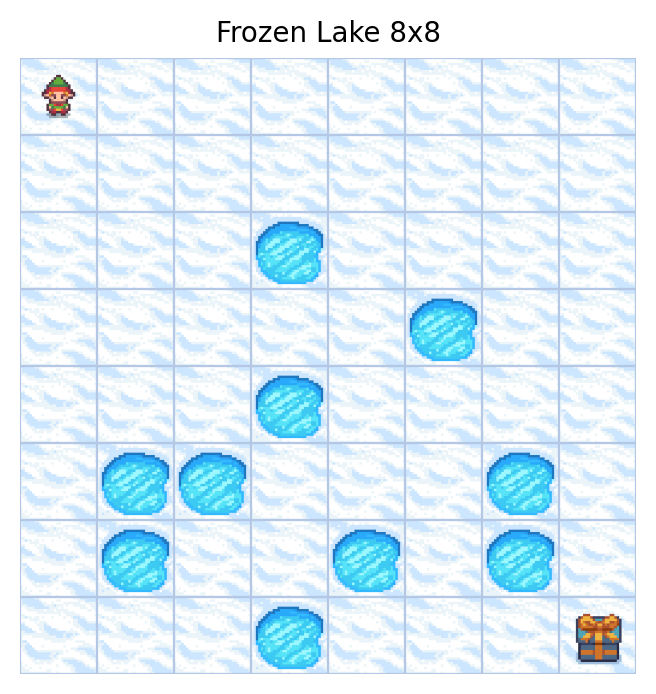

In [4]:
env.reset()
plot_env(env,figsize=(4,4),title_str='Frozen Lake 8x8',title_fs=10)

Check state and action spaces

In [5]:
obs_space    = env.observation_space
n_state      = obs_space.n
action_space = env.action_space
n_action     = action_space.n
print("State space:[%d]"%(n_state))
print("Action space:[%d]"%(n_action))

State space:[64]
Action space:[4]


Loop with random actions

In [6]:
env.reset() 
n_step = 100
frames = []
for tick in range(n_step):
    action = env.action_space.sample()
    observation, reward, done, truncated, info = env.step(action) # step
    title_str = "tick:[%d/%d] action:[%s] reward:[%.2f] done:[%d]"%(
        tick,n_step,action,reward,done
    )
    img = plot_env(env,figsize=(4,4),title_str=title_str,title_fs=8,
                   PLOT_IMG=False,RETURN_IMG=True)
    frames.append(img)
    if done: break
env.close()
print ("Done (tick:[%d])."%(tick))

Done (tick:[24]).


Animate

In [7]:
media.show_video(frames, fps=5)

Check transition probability and reward

In [8]:
P = env.unwrapped.P 
for s in P.keys(): # for all states
    for a in P[s].keys(): # for all actions
        for (prob,s_prime,rwd,_) in P[s][a]:
            print ("P(s':%02d|s:%02d,a:%02d)=%.2f, Reward=%.2f"%
                   (s_prime,s,a,prob,rwd))

P(s':00|s:00,a:00)=0.33, Reward=0.00
P(s':00|s:00,a:00)=0.33, Reward=0.00
P(s':08|s:00,a:00)=0.33, Reward=0.00
P(s':00|s:00,a:01)=0.33, Reward=0.00
P(s':08|s:00,a:01)=0.33, Reward=0.00
P(s':01|s:00,a:01)=0.33, Reward=0.00
P(s':08|s:00,a:02)=0.33, Reward=0.00
P(s':01|s:00,a:02)=0.33, Reward=0.00
P(s':00|s:00,a:02)=0.33, Reward=0.00
P(s':01|s:00,a:03)=0.33, Reward=0.00
P(s':00|s:00,a:03)=0.33, Reward=0.00
P(s':00|s:00,a:03)=0.33, Reward=0.00
P(s':01|s:01,a:00)=0.33, Reward=0.00
P(s':00|s:01,a:00)=0.33, Reward=0.00
P(s':09|s:01,a:00)=0.33, Reward=0.00
P(s':00|s:01,a:01)=0.33, Reward=0.00
P(s':09|s:01,a:01)=0.33, Reward=0.00
P(s':02|s:01,a:01)=0.33, Reward=0.00
P(s':09|s:01,a:02)=0.33, Reward=0.00
P(s':02|s:01,a:02)=0.33, Reward=0.00
P(s':01|s:01,a:02)=0.33, Reward=0.00
P(s':02|s:01,a:03)=0.33, Reward=0.00
P(s':01|s:01,a:03)=0.33, Reward=0.00
P(s':00|s:01,a:03)=0.33, Reward=0.00
P(s':02|s:02,a:00)=0.33, Reward=0.00
P(s':01|s:02,a:00)=0.33, Reward=0.00
P(s':10|s:02,a:00)=0.33, Reward=0.00
P

### CartPole environment

In [9]:
env = gym.make('CartPole-v1',render_mode='rgb_array')
print ("[%s] initialized."%(env.unwrapped.spec.id))

[CartPole-v1] initialized.


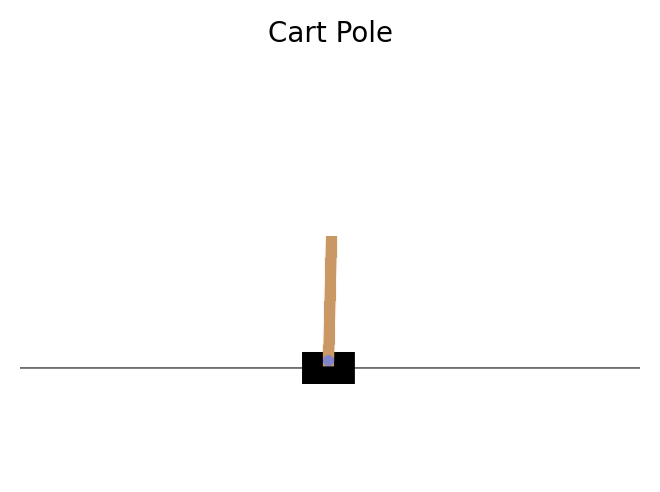

In [13]:
env.reset()
plot_env(env,figsize=(4,3),title_str='Cart Pole',title_fs=10)

Check state and action spaces

In [11]:
obs_space    = env.observation_space
n_state      = obs_space.n
action_space = env.action_space
n_action     = action_space.n
print("State space:[%d]"%(n_state))
print("Action space:[%d]"%(n_action))

AttributeError: 'Box' object has no attribute 'n'

In [ ]:
obs_space    = env.observation_space
obs_low      = obs_space.low
obs_high     = obs_space.high
action_space = env.action_space
n_action     = action_space.n
print("State space:[%s~%s]"%(obs_low,obs_high))
print("Action space:[%d]"%(n_action))

Loop with random actions

In [16]:
env.reset() 
n_step = 100
frames = []
for tick in range(n_step):
    action = env.action_space.sample()
    observation, reward, done, truncated, info = env.step(action) # step
    title_str = "tick:[%d/%d] action:[%s] reward:[%.2f] done:[%d]"%(
        tick,n_step,action,reward,done
    )
    img = plot_env(env,figsize=(4,3),title_str=title_str,title_fs=8,
                   PLOT_IMG=False,RETURN_IMG=True)
    frames.append(img)
    if done: break
env.close()
print ("Done (tick:[%d])."%(tick))

Done (tick:[19]).


Animate

In [17]:
media.show_video(frames, fps=5)